# <h1><center>Baloncuk (Bubble Maps) Haritalar</center></h1>

In [1]:
#!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

<img src='https://www.espatial.com/wp-content/uploads/GDP-of-countries.jpg'></img>

In [2]:
malmo_mahalle = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Geopandas Data Visualisation/malmo-pop.shp")
malmo_mahalle.head()

,fid,Deso,Age_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,Age40_44,Age45_49,Age50_54,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Total,geometry
0,2822.0,1280C1590,125.0,82.0,113.0,83.0,80.0,104.0,99.0,109.0,103.0,99.0,115.0,88.0,93.0,101.0,112.0,141.0,410.0,2057.0,"POLYGON ((373380.287 6160661.365, 373382.480 6..."
1,2823.0,1280C1430,332.0,201.0,262.0,141.0,165.0,217.0,212.0,195.0,168.0,140.0,139.0,140.0,101.0,75.0,54.0,39.0,35.0,2616.0,"POLYGON ((372667.079 6159991.971, 372653.152 6..."
2,2824.0,1280C1220,128.0,69.0,65.0,34.0,93.0,132.0,135.0,109.0,82.0,71.0,91.0,91.0,119.0,153.0,110.0,92.0,122.0,1696.0,"POLYGON ((372812.733 6158498.565, 372817.194 6..."
3,2825.0,1280C1490,76.0,70.0,118.0,92.0,102.0,57.0,48.0,89.0,87.0,108.0,101.0,94.0,80.0,59.0,62.0,35.0,62.0,1340.0,"POLYGON ((374168.622 6160181.233, 374169.100 6..."
4,2826.0,1280C1530,220.0,94.0,118.0,74.0,150.0,200.0,196.0,163.0,135.0,113.0,81.0,107.0,92.0,77.0,45.0,31.0,32.0,1928.0,"POLYGON ((375219.802 6160462.505, 375274.357 6..."


In [3]:
# Veri setindeki mahalle poligonlarının orta noktalarını (centroid) çıkardığımız yeni bir veri seti oluşturalım. 
# Bunun için elimizdeki veri setinin kopyasını alıp, geometry sütununa bu centroid noktaları yerleştirelim. 
malmo_mahalle_noktalar = malmo_mahalle.copy()
malmo_mahalle_noktalar['geometry'] = malmo_mahalle_noktalar['geometry'].centroid
malmo_mahalle_noktalar.head()

,fid,Deso,Age_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,Age40_44,Age45_49,Age50_54,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Total,geometry
0,2822.0,1280C1590,125.0,82.0,113.0,83.0,80.0,104.0,99.0,109.0,103.0,99.0,115.0,88.0,93.0,101.0,112.0,141.0,410.0,2057.0,POINT (373736.130 6160844.324)
1,2823.0,1280C1430,332.0,201.0,262.0,141.0,165.0,217.0,212.0,195.0,168.0,140.0,139.0,140.0,101.0,75.0,54.0,39.0,35.0,2616.0,POINT (372932.457 6160165.211)
2,2824.0,1280C1220,128.0,69.0,65.0,34.0,93.0,132.0,135.0,109.0,82.0,71.0,91.0,91.0,119.0,153.0,110.0,92.0,122.0,1696.0,POINT (373183.207 6158866.154)
3,2825.0,1280C1490,76.0,70.0,118.0,92.0,102.0,57.0,48.0,89.0,87.0,108.0,101.0,94.0,80.0,59.0,62.0,35.0,62.0,1340.0,POINT (374515.204 6160556.319)
4,2826.0,1280C1530,220.0,94.0,118.0,74.0,150.0,200.0,196.0,163.0,135.0,113.0,81.0,107.0,92.0,77.0,45.0,31.0,32.0,1928.0,POINT (375533.769 6160531.143)


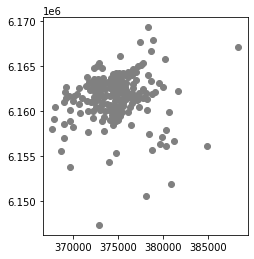

In [4]:
# Bu noktaları çizdirelim. 
malmo_mahalle_noktalar.plot(color="grey");

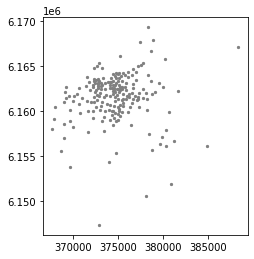

In [5]:
# Bu noktaların çiziminde, nokta boyunu kendimiz belirleyelim. Bunun için markersize argümanını kullanalım. 
malmo_mahalle_noktalar.plot(color="grey", markersize=5)

Baloncuk harita çizimindeki püf noktası, mahalleleri temsil eden noktaların boyutunu veri setindeki herhangi bir sütunun barındırdığı sayısal değerlere göre ölçeklendirerek çizdirmektir.

Örneğin, mahalleleri temsil eden noktaların boyutunu, o mahallede yaşayan 80 yaş ve üstü nüfusa orantılı bir şekilde çizdirelim.

Bunun için `plot` fonksiyonu içinde `markersize` argümanını, orantılamak istediğimiz sütun ismi ile `"Age80_w"` atamamız gerekmektedir. 

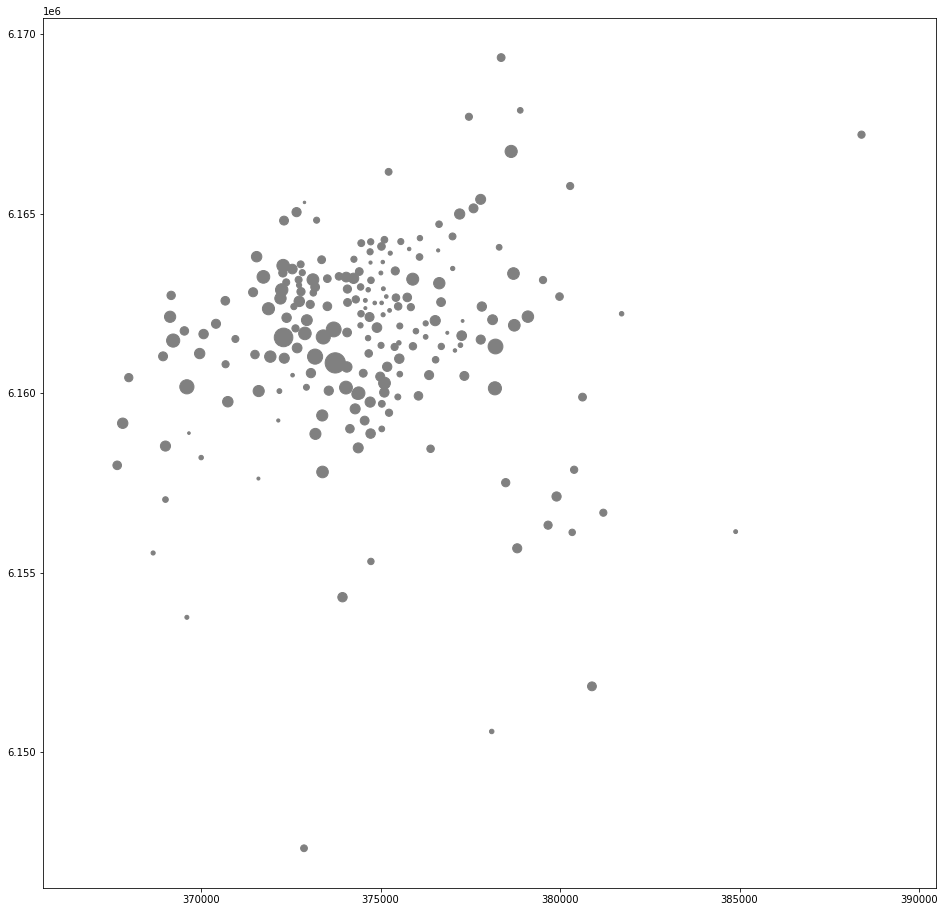

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
malmo_mahalle_noktalar.plot(ax=ax,color="grey", markersize="Age80_w")
#ax.axis("off")
plt.axis('equal')
plt.show()

Bu görselleştirme kartografik olarak yeterli değildir. Dolayısıyla zenginleştirme yapalım.

* İlk olarak, açık gri renkte mahalle sınırlarını gösteren ilk ham veriyi (`malmo_mahalle`) çizime ekleyelim.  
* Daha sonra mahalleleri temsil eden noktaları ekleyelim. Renk seçimini yapalım. Nokta boyutlarını, 80 yaş ve üstü nüfus verisi ile orantılayalım. Lejantı açalım. Veri seti kategorik değil, nümerik değerler içermektedir. Dolayısıyla `categorical=False` argümanını eklememiz gerekir. 
* Çizimin eksenlerini kapatalım (axis-off)
* Çizimin eksen boyutlarını eşit tutalım (plt.axis - equal) 

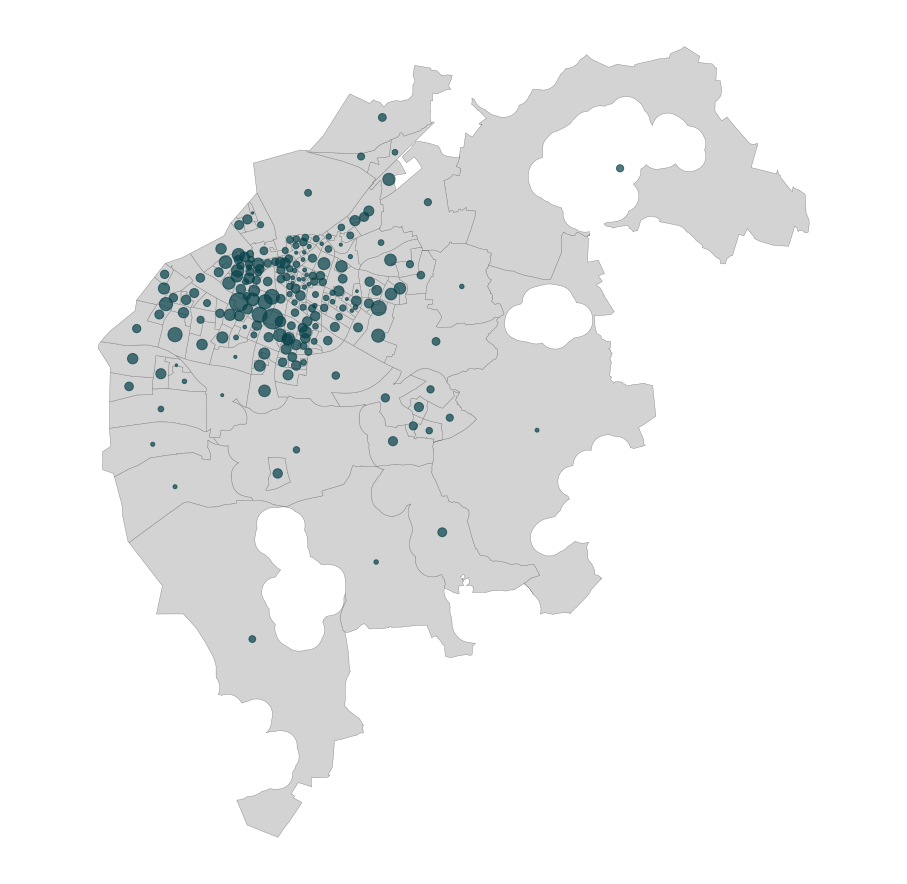

In [7]:
fig, ax = plt.subplots(figsize=(16,16))
malmo_mahalle.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4)
malmo_mahalle_noktalar.plot(ax=ax,color="#07424A", markersize="Age80_w",alpha=0.7, categorical=False)

ax.axis("off")
plt.axis('equal')

plt.show()